In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/content/traffic_data_dyn (1).csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Check column names and data types
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86635 entries, 0 to 86634
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         86635 non-null  float64
 1   Vehicle Count at Junction A  86635 non-null  int64  
 2   Vehicle Count at Junction B  86635 non-null  int64  
 3   Vehicle Count at Junction C  86635 non-null  int64  
 4   Vehicle Count at Junction D  86635 non-null  int64  
 5   Vehicle Count at Junction E  86635 non-null  int64  
 6   Avg Speed on AB              86635 non-null  float64
 7   Avg Speed on BC              86635 non-null  float64
 8   Avg Speed on CA              86635 non-null  float64
 9   Avg Speed on CD              86635 non-null  float64
 10  Avg Speed on ED              86635 non-null  float64
 11  Avg Speed on DA              86635 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 7.9 MB
None
   Time  Vehicle Count a

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load Data
file_path = "/content/traffic_data_dyn (1).csv"
df = pd.read_csv(file_path)

# Select features and target
features = [
    "Vehicle Count at Junction A", "Vehicle Count at Junction B",
    "Vehicle Count at Junction D", "Vehicle Count at Junction E",
    "Avg Speed on AB", "Avg Speed on BC", "Avg Speed on CA",
    "Avg Speed on CD", "Avg Speed on ED", "Avg Speed on DA"
]
target = "Vehicle Count at Junction C"

# Normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features + [target]])

# Convert to NumPy
df_scaled = np.array(df_scaled)

# Define sequence length
SEQ_LENGTH = 5  # Reduce to save memory

# Use NumPy array slicing for efficient sequence creation
X = np.array([df_scaled[i:i+SEQ_LENGTH, :-1] for i in range(len(df_scaled) - SEQ_LENGTH)])
y = np.array([df_scaled[i+SEQ_LENGTH, -1] for i in range(len(df_scaled) - SEQ_LENGTH)])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Optimized Shape - X_train:", X_train.shape, "y_train:", y_train.shape)


Optimized Shape - X_train: (69304, 5, 10) y_train: (69304,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation

# Define Pelliot activation function
def pelliot_activation(x, a=0.5):
    return x / (1 + a * K.abs(x))

# Create a custom activation layer
class PelliotActivation(Activation):
    def __init__(self, activation, **kwargs):
        super(PelliotActivation, self).__init__(activation, **kwargs)
        self.__name__ = 'pelliot_activation'

# Register the activation
tf.keras.utils.get_custom_objects().update({'pelliot_activation': PelliotActivation(pelliot_activation)})


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    LSTM(32, return_sequences=False),
    Dense(16, activation=PelliotActivation(pelliot_activation)),  # Pelliot activation
    Dense(1)  # Output layer (vehicle count)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,161 (125.63 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0244 - mae: 0.1243 - val_loss: 0.0193 - val_mae: 0.1107
Epoch 2/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0185 - mae: 0.1069 - val_loss: 0.0182 - val_mae: 0.1068
Epoch 3/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0180 - mae: 0.1057 - val_loss: 0.0182 - val_mae: 0.1064
Epoch 4/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0176 - mae: 0.1041 - val_loss: 0.0177 - val_mae: 0.1032
Epoch 5/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0173 - mae: 0.1029 - val_loss: 0.0175 - val_mae: 0.1053
Epoch 6/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0171 - mae: 0.1025 - val_loss: 0.0168 - val_mae: 0.1026
Epoch 7/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0164 - mae: 0.1003 - val_loss: 0.0167 - val_mae: 0.1011
Epoch 8/200
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.0158 - mae: 0.0986 - val_loss: 0.0161 - val_mae: 0.1001
Epoch 9/200
2166/2166 ━━

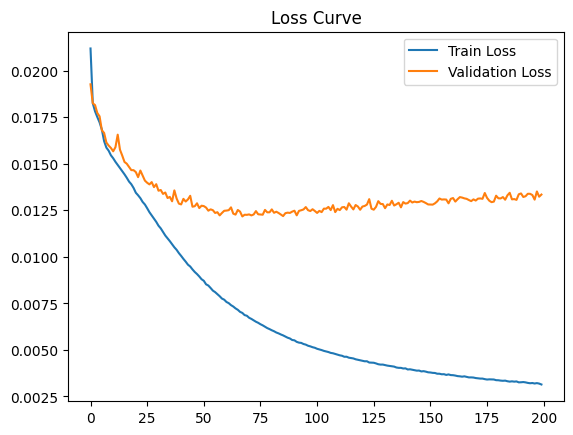

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Plot training loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Convert back to original scale
y_test_actual = scaler.inverse_transform(np.column_stack([X_test[:, -1, :], y_test]))[:, -1]
y_pred_actual = scaler.inverse_transform(np.column_stack([X_test[:, -1, :], y_pred.flatten()]))[:, -1]

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")



542/542 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Mean Absolute Error: 1.2711
R² Score: 0.5928


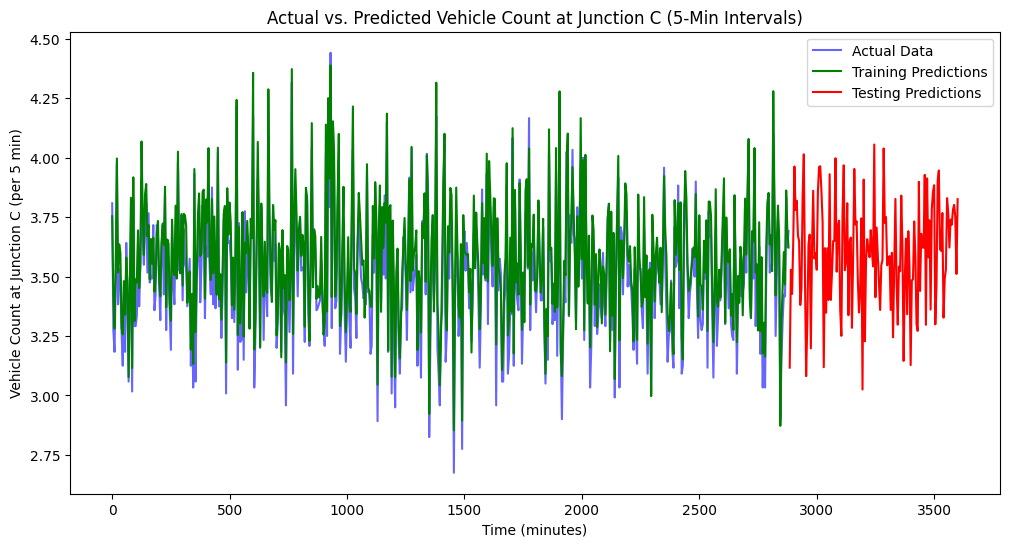

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to aggregate data into 5-minute intervals
def aggregate_to_5min(data, interval=120, method="mean"):
    data = data[: len(data) // interval * interval]  # Trim to fit exact intervals
    data = data.reshape(-1, interval)  # Reshape into (num_intervals, interval_size)

    if method == "mean":
        return data.mean(axis=1)
    elif method == "sum":
        return data.sum(axis=1)

# Aggregate actual and predicted values
y_train_actual_5min = aggregate_to_5min(y_train_actual)
y_train_pred_actual_5min = aggregate_to_5min(y_train_pred_actual)
y_test_actual_5min = aggregate_to_5min(y_test_actual)
y_test_pred_actual_5min = aggregate_to_5min(y_test_pred_actual)

# Generate time axis (5-minute intervals)
time_train = np.arange(0, len(y_train_actual_5min) * 5, 5)  # Every 5 minutes
time_test = np.arange(len(y_train_actual_5min) * 5, (len(y_train_actual_5min) + len(y_test_actual_5min)) * 5, 5)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(time_train, y_train_actual_5min, label="Actual Data", color="blue", alpha=0.6)
plt.plot(time_train, y_train_pred_actual_5min, label="Training Predictions", color="green")
plt.plot(time_test, y_test_pred_actual_5min, label="Testing Predictions", color="red")

plt.xlabel("Time (minutes)")
plt.ylabel("Vehicle Count at Junction C (per 5 min)")
plt.legend()
plt.title("Actual vs. Predicted Vehicle Count at Junction C (5-Min Intervals)")
plt.show()
